# HOUSING: PRICE PREDICTION

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

The company is looking at prospective properties to buy houses to enter the market. We are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

#### In this model we will predict:
• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

# Business Goal:
We are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

### Technical Requirements:
• Data contains 1460 entries each having 81 variables.

• Data contains Null values. We need to treat them.

• We perform Extensive EDA to gain relationships between important variable and price.

• Data contains numerical as well as categorical variable.

• We build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 

• We will find important features which affect the price positively or negatively.

• Two datasets are being provided to (test.csv, train.csv). We will train our model on train.csv dataset and predict on test.csv 

We build a machine learning model to predict the Sale price of Houses.

# WORK: 
1) IMPORTING LIBRARIES

2) LOADING TRAIN DATASET & DESCRIPTION

3) DATA PREPROCESSING OF TRAIN DATA

4) EXPLORATORY DATA ANALYSIS

5) SPLITING DATA AND APPLYING train_test_split

6) PREDICTING MODEL

7) GRID SEARCH CV

9) TUNNING WITH BEST PARAMETERS

10) SAVING OUR MODEL

11) LOADING TEST DATASET

12) DATA PREPROCESSING & CLEANING OF TEST DATASET

13) LOADING THE TEST DATA ON TRAINED DATA

14) RESULTS & CONCLUSION

# TARGET VARIABLE:
In this context, the use regression models to predict the "SalePrice" of Houses.

"SalePrice" is oure target varaible.

In [1]:
# importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
## load the data into a pandas dataframe using the read_csv function.

df = pd.read_csv("train HousigProject.csv")

In [3]:
df.shape

(1168, 81)

In [4]:
# looking top 10 rows

df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [5]:
#l looking last 10 rows

df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1158,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
1159,943,90,RL,42.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
1160,551,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,140000
1161,1301,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1162,1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.columns.size

81

In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# DESCRIBING DATA

The measures of central tendency and distribution are some measures to define the data set.

The measures used to define the central tendency are mean, median and mode.

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

##### describe function only shows the variable which are numeric.

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



OBSERVATIONS:

Mean of "SalePrice": 181477.005993

Minimum "SalePrice" of House: 34900

Max "SalePrice" of House: 755000

We can see there is huge difference in Min & Max value of "SalePrice"

# EXPLORATORY DATA ANALYSIS

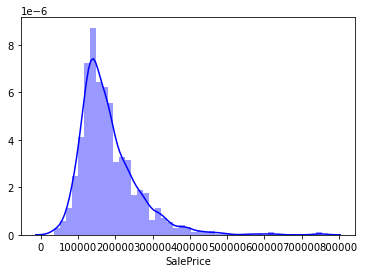

In [10]:
# Visualizing our target variable

sns.distplot(df["SalePrice"], kde=True,color = 'blue')

WE CAN VISUALIZE RIGHT SKEWNESS IN OUR TARGET VARAIBLE

###  Univariate analysis of Categorical varaibles:

In [11]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

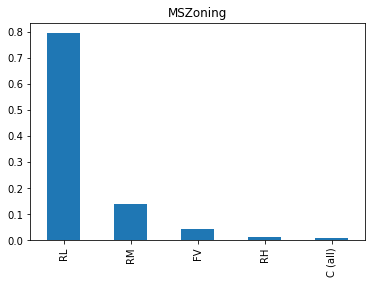

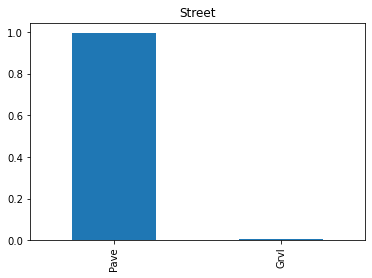

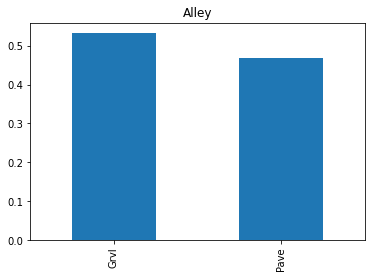

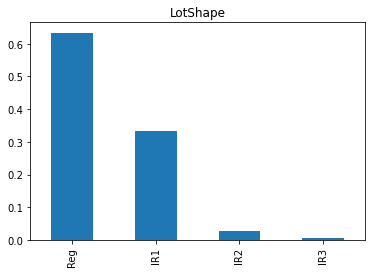

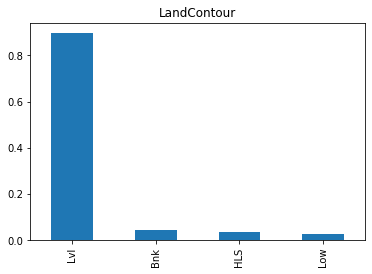

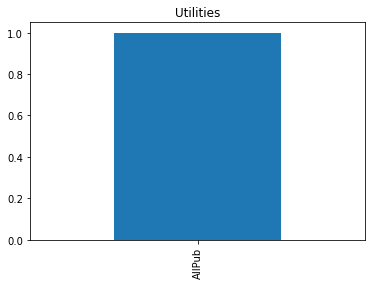

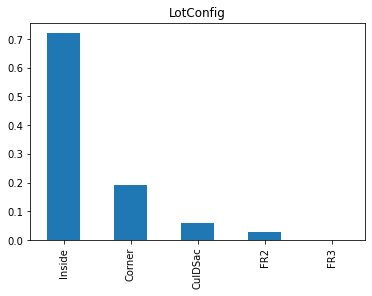

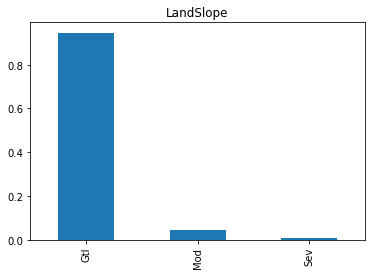

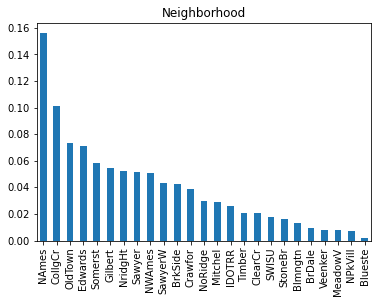

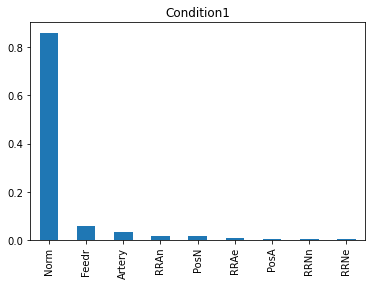

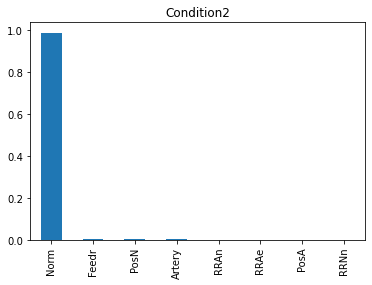

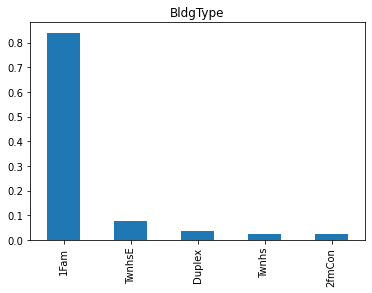

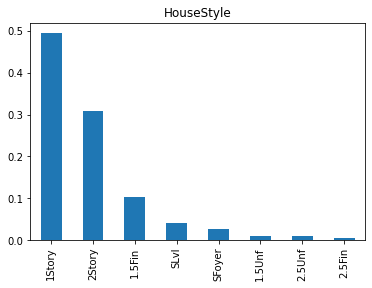

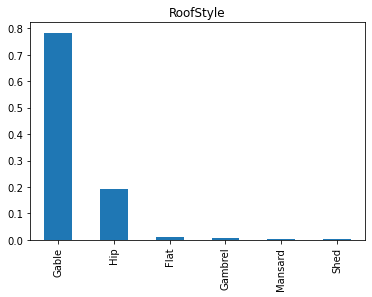

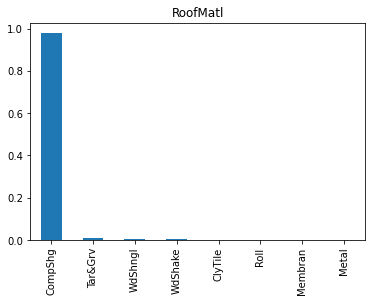

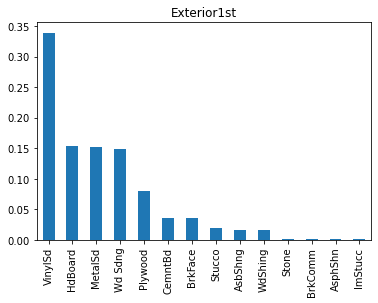

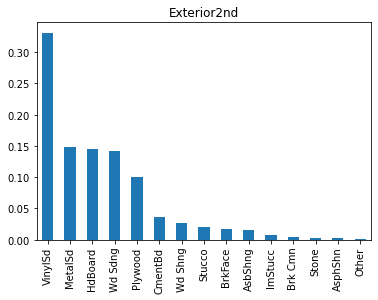

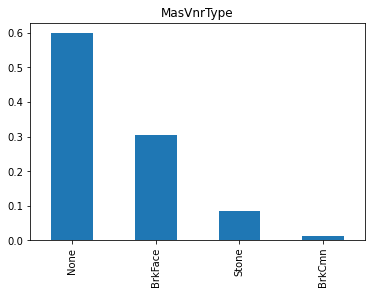

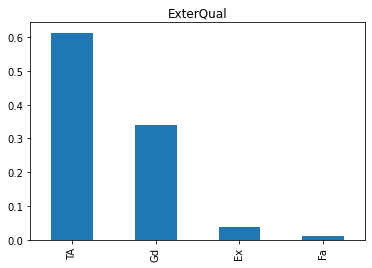

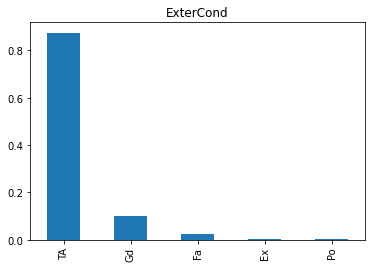

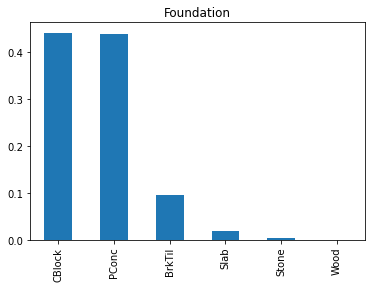

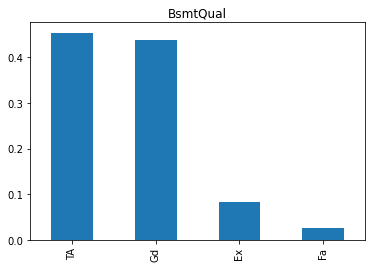

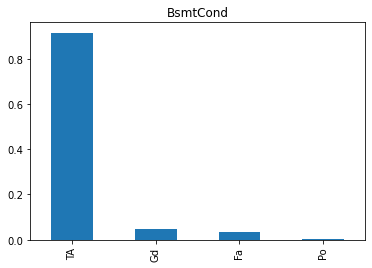

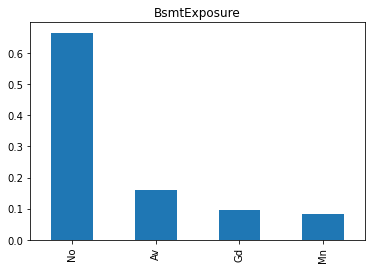

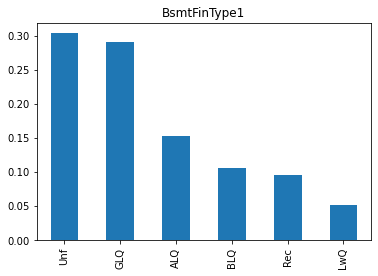

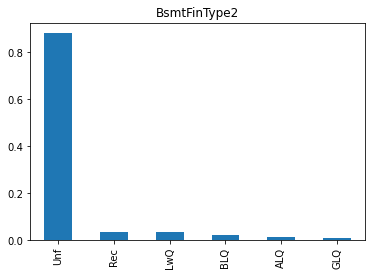

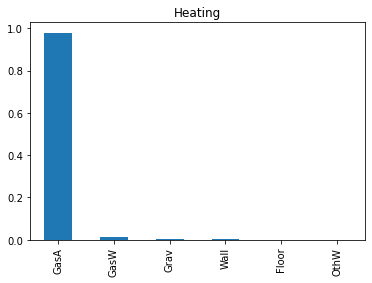

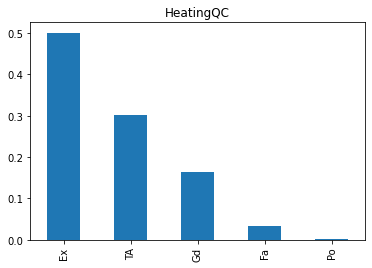

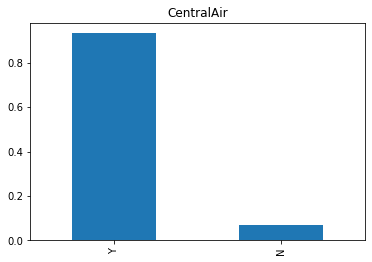

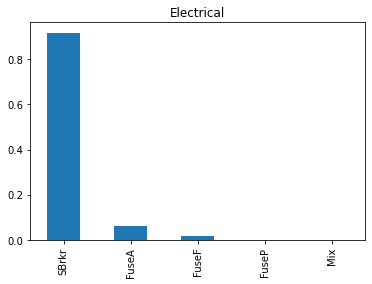

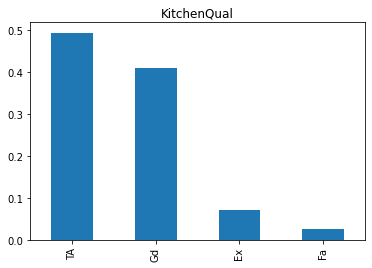

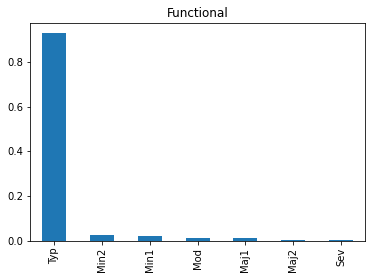

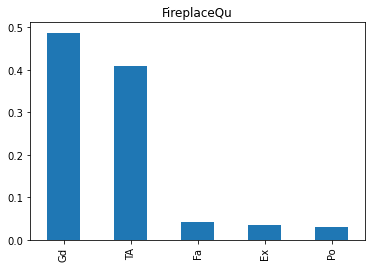

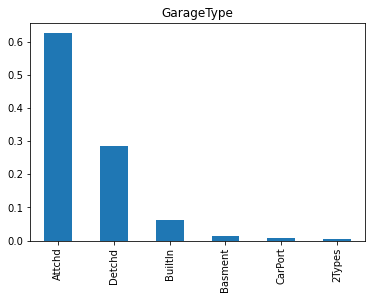

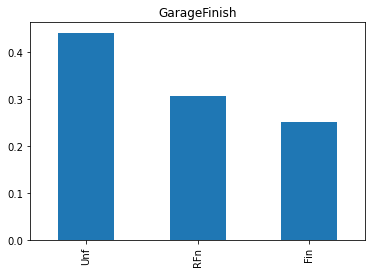

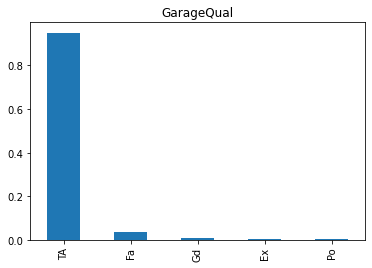

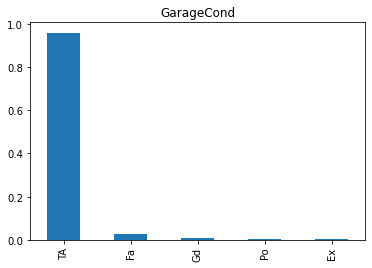

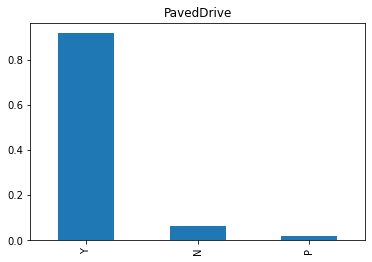

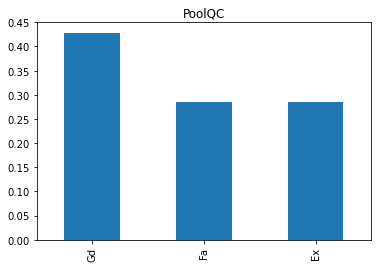

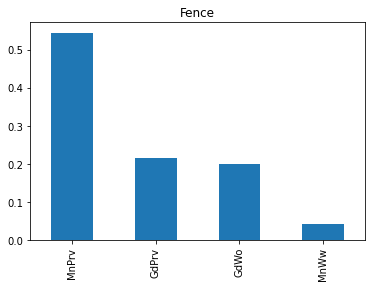

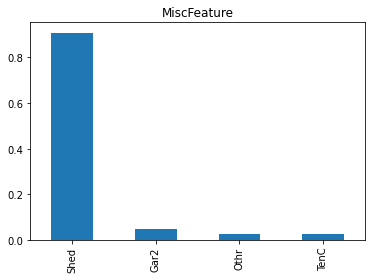

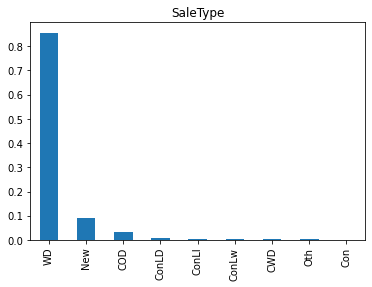

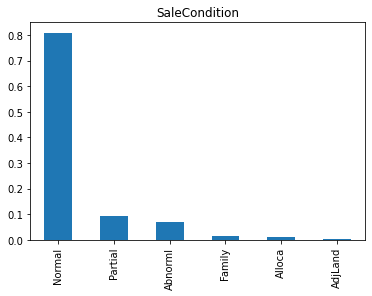

In [12]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i].value_counts(normalize=True).plot.bar(figsize=(6,4), title=i)
        plt.show() 

### Analysis of Variable which are Continous:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283B428C340>,
      dtype=object)

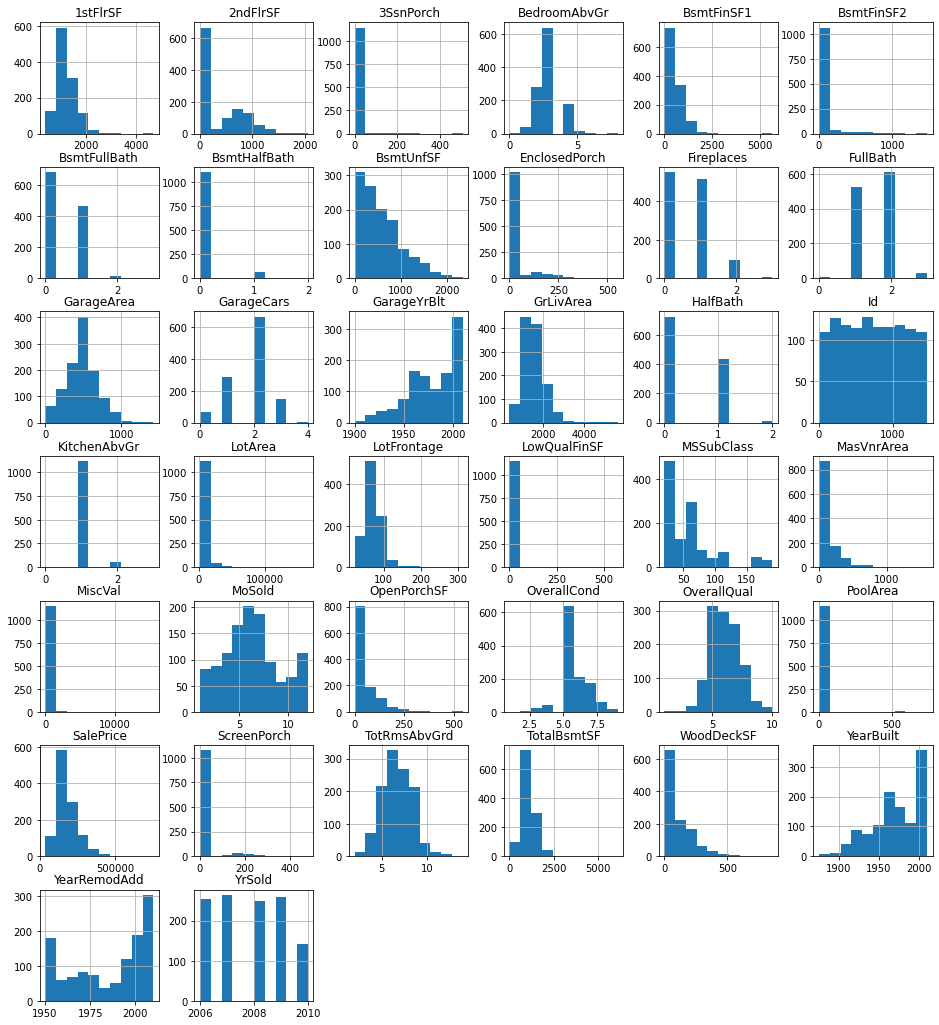

In [13]:
# we use histogram for showing our continous variables.

df.hist(figsize=(16,18),sharex=False)

Right skewness is present in most of our contionous varaibles.

# DATA PRE-PROCESSING

Data Cleaning and pre-processing is very important part to create any machine learning model. The cleaner the data will be, the better the prediction will come.

This data provided is raw and we have to run many functions to clean.

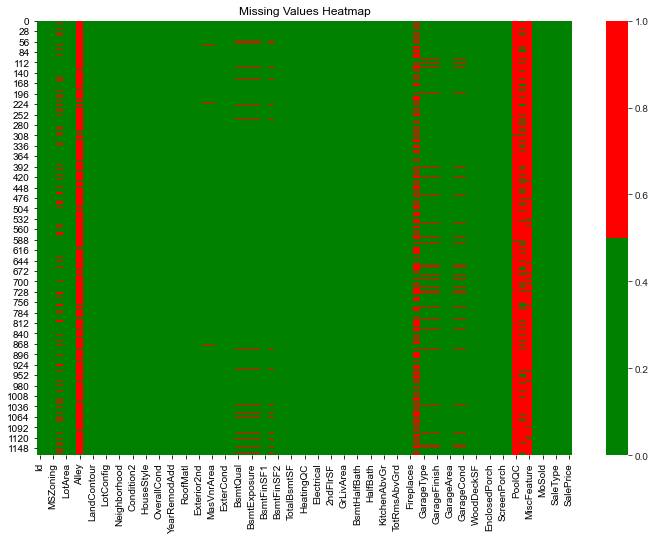

In [14]:
cols = df.columns 
colours = ['g', 'r'] 
f, ax = plt.subplots(figsize = (12,8))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

we can visualize that NaN values are present in our dataset.

We will treat them first:

In [15]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
df.shape

(1168, 81)

### Droping irrelevant columns:

1) Id has all the unique vales.

2) Utilites has only one unique value.

3) 'Alley','FireplaceQu','PoolQC','Fence','MiscFeature' has more than 70% NaNvalues.

Hence these varaibles are not contributing in our predictions.
we will drop these varaiables.

In [17]:
df = df.drop(columns = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities','Id'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

In [19]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0,0,224,0,0,10,2007,WD,Normal,268000


In [20]:
for i in df.columns:
    if df[i].dtypes!= "object":
        df[i]=df[i].fillna(df[i].mean())

In [21]:
# replace NaN vales with mode

df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])
df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])

In [22]:
# check unique values in dataset

df.apply(lambda x: len(x.unique()))

MSSubClass        15
MSZoning           5
LotFrontage      107
LotArea          892
Street             2
                ... 
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
SalePrice        581
Length: 74, dtype: int64

# LabelEncoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
# encoding the columns which are in string format into numeric format

for i in df.columns:
    if df[i].dtypes== "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [25]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,4,0,13,...,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,4,1,12,...,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,1,0,15,...,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,4,0,14,...,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,2,0,14,...,0,0,0,0,0,6,2009,8,4,215000


We can visualize that all attributes are now in Numeric form only.

# FINDING CORRELATION

In [26]:
corr= df.corr()
corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.104485,-0.021387,0.076880,-0.014930,0.013918,...,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069661,-0.023328,0.140215,0.053655,0.001175,-0.027246,-0.023952,-0.251833,...,0.111221,0.004409,0.030793,-0.001663,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.144523,-0.073451,-0.192468,0.046051,0.065824,...,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.189201,-0.159038,-0.152063,0.395410,0.010707,...,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035309,-0.263973,1.000000,-0.012941,0.105226,0.000153,-0.141572,0.001420,...,0.021360,0.007338,0.016026,0.004505,-0.030354,-0.008860,-0.019635,0.025920,0.014176,0.044753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.016015,-0.051646,0.022517,0.015141,-0.008860,-0.050418,-0.023872,0.019084,0.030526,0.023378,...,-0.036523,0.020406,0.033064,-0.038624,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.038595,-0.004964,-0.003885,-0.035399,-0.019635,0.021421,0.009499,-0.009817,-0.005352,0.026181,...,-0.005767,0.014440,0.017312,-0.066063,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.035050,0.079854,-0.035356,0.005421,0.025920,-0.015161,-0.041763,-0.002039,0.056004,-0.023081,...,-0.008234,-0.013696,0.010760,0.014047,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.028981,0.004501,0.065091,0.034236,0.014176,-0.054905,0.047715,0.043692,-0.061461,0.042340,...,-0.091563,0.001236,0.002670,-0.074354,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


In [27]:
corr_matrix=df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
                  ...   
HeatingQC      -0.406604
GarageFinish   -0.537121
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.626850
Name: SalePrice, Length: 74, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

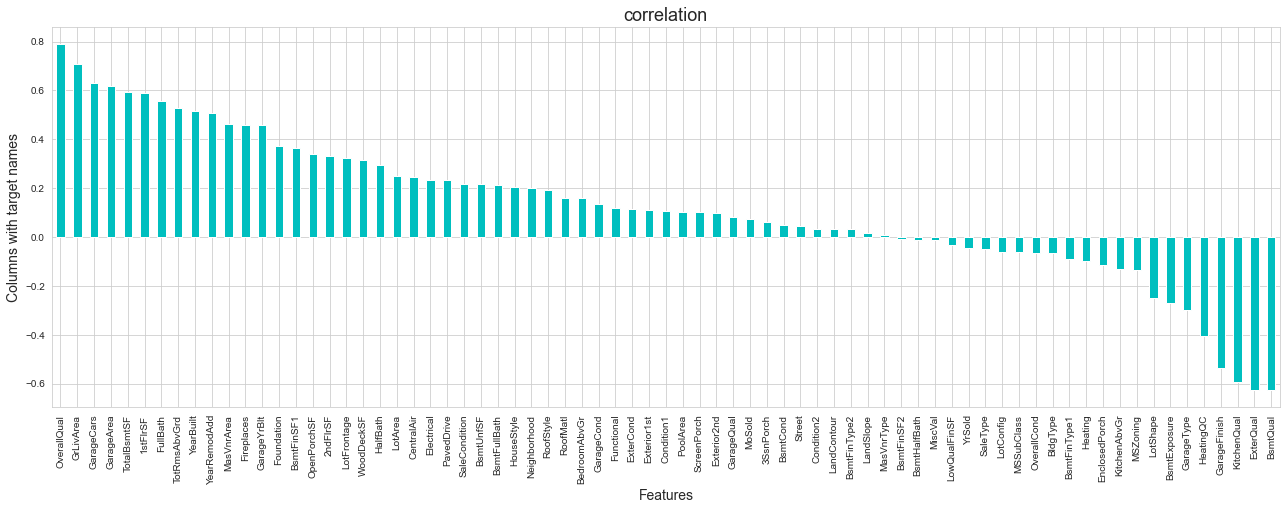

In [28]:
plt.figure(figsize=(22,7))
df.corr()["SalePrice"].sort_values(ascending=False).drop(["SalePrice"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

We can see that left side varaibles have srtrong positive relationship with our target varaible i.e. salePrice.

OverallQual has a very strong positive relation with sale price of house.

# Treating Outliers

In [29]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64),
 array([ 8, 19, 33, ..., 38, 60, 61], dtype=int64))

In [30]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,4,0,13,...,0,0,0,0,0,2,2007,8,4,128000
2,60,3,92.00000,9920,1,0,3,1,0,15,...,0,0,0,0,0,6,2007,8,4,269790
5,60,3,58.00000,14054,1,0,3,4,0,8,...,0,0,0,0,0,11,2006,6,5,219210
6,20,3,70.98847,11341,1,0,3,4,0,19,...,0,0,95,0,0,5,2010,8,4,121500
11,60,3,44.00000,9548,1,0,3,1,0,5,...,0,0,0,0,0,1,2010,8,4,237000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,20,3,70.98847,11250,1,0,3,4,0,24,...,0,0,0,0,0,6,2006,8,4,165000
1161,60,3,70.98847,10762,1,0,3,1,0,8,...,0,0,0,0,0,5,2009,8,4,225000
1163,20,3,70.98847,9819,1,0,3,4,0,19,...,0,0,0,0,0,2,2010,8,4,122000
1165,160,3,24.00000,2280,1,3,3,2,0,13,...,0,0,0,0,0,7,2009,8,4,148500


In [31]:
df_new_z.shape

(482, 74)

In [32]:
df.shape

(1168, 74)

In [33]:
Data_loss=((1168-482)/1168)*100

In [34]:
Data_loss

58.73287671232876

We will loss our 59% of data with z-score. It will give baised predictions. we cannot afford to loss such a huge data.

We will continue with our previous dataset.

# Splitting the data into X(INDEPENDENT VAR) & Y(DEPENDENT VAR)

In [35]:
x= df.drop("SalePrice",axis=1)     # independent variable
y= df["SalePrice"]                 # dependent variable

In [36]:
x.columns.size

73

In [37]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

# SKEWNESS

In [38]:
x.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
                   ...    
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
Length: 73, dtype: float64

In [39]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x_new=pd.DataFrame(x_new,columns=x.columns)

# SCALING

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x_new=pd.DataFrame(scaler.fit_transform(x), columns= x_new.columns)

all the train data columns are in range 0-1.

our predictions will be more accurate now.

# FINDING BEST RANDOM STATE

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.20, random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8788418765460277 on Random_state 49


# Finding best algorithm for our model:

In [42]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [43]:
LR= LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ad= AdaBoostRegressor()
svr= SVR()

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.20, random_state=49)
for i in (LR,knn, dt, rf,ad,svr):
    i.fit(x_train, y_train)
    
    pred = i.predict(x_test)
    
    print("r2_score",i,"=", r2_score(y_test,pred))

r2_score LinearRegression() = 0.8788418765460277
r2_score KNeighborsRegressor() = 0.76782144479754
r2_score DecisionTreeRegressor() = 0.7715329793580774
r2_score RandomForestRegressor() = 0.8863806733952591
r2_score AdaBoostRegressor() = 0.8061650069148808
r2_score SVR() = -0.04389742655833828


# CROSS_VALIDATION_SCORE

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.20, random_state=49)
for i in (LR,knn, dt, rf,ad,svr):
    scr=cross_val_score(i,x,y,cv=5)
    print("cross validation score",i,"=", scr.mean())

cross validation score LinearRegression() = 0.7415366569554174
cross validation score KNeighborsRegressor() = 0.6146961229668827
cross validation score DecisionTreeRegressor() = 0.7012216335618362
cross validation score RandomForestRegressor() = 0.8419939876369481
cross validation score AdaBoostRegressor() = 0.7986346953233634
cross validation score SVR() = -0.062134440998616515


The minimum differnce between r2_score & cross_Val_Score is in RandomForestRegressor.

Therefore, we will do prediction on RandomForestRegressor as it is giving the highest accuracy to our model.

# Hyperparameter tunning with best model

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'criterion':('mse', 'mae'), "max_features":["auto","sqrt","log2"]}
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [49]:
clf_pred=clf.best_estimator_.predict(x_test)

In [50]:
r2_score(y_test,clf_pred)

0.8764863756483472

In [51]:
rf=RandomForestRegressor( criterion='mae',  max_features='sqrt',  random_state=49)

In [52]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=49)

# SAVING OUR MODEL

In [53]:
import pickle
filename= "HousingProject_rf.pkl"
pickle.dump(rf,open(filename,"wb"))

# USING THE TEST DATA

In [54]:
#loading the test data

df_test = pd.read_csv("test HousingProject.csv")

In [55]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [56]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [57]:
df_test.shape

(292, 80)

In [58]:
# check unique values in dataset

df_test.apply(lambda x: len(x.unique()))

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       66
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 80, dtype: int64

# CLEANING OUR DATASET

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [60]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [61]:
df_test = df_test.drop(columns = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities','Id'])

In [62]:
for i in df_test.columns:
    if df_test[i].dtypes!= "object":
        df_test[i]=df_test[i].fillna(df_test[i].mean())

In [63]:
# replace NaN vales with mode

df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test["BsmtQual"] = df_test["BsmtQual"].fillna(df_test["BsmtQual"].mode()[0])
df_test["BsmtCond"] = df_test["BsmtCond"].fillna(df_test["BsmtCond"].mode()[0])
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].fillna(df_test["BsmtFinType1"].mode()[0])
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna(df_test["BsmtFinType2"].mode()[0])
df_test["GarageQual"] = df_test["GarageQual"].fillna(df_test["GarageQual"].mode()[0])
df_test["GarageCond"] = df_test["GarageCond"].fillna(df_test["GarageCond"].mode()[0])
df_test["GarageFinish"] = df_test["GarageFinish"].fillna(df_test["GarageFinish"].mode()[0])
df_test["GarageType"] = df_test["GarageType"].fillna(df_test["GarageType"].mode()[0])
df_test["Electrical"] = df_test["Electrical"].fillna(df_test["Electrical"].mode()[0])

# LabelEncoding

In [64]:
# encoding the columns which are in string format into numeric format

for i in df_test.columns:
    if df_test[i].dtypes== "object":
        df_test[i]=le.fit_transform(df_test[i].values.reshape(-1,1))

In [65]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,21,...,51,0,0,0,0,0,7,2007,5,2
1,120,2,66.425101,5814,1,0,3,1,0,21,...,0,0,0,0,0,0,8,2009,0,0
2,20,2,66.425101,11838,1,3,3,4,0,4,...,151,0,0,0,0,0,6,2009,5,2
3,70,2,75.000000,12000,1,3,0,4,0,5,...,0,0,0,0,0,0,7,2009,5,2
4,60,2,86.000000,14598,1,0,3,1,0,20,...,18,0,0,0,0,0,1,2008,5,2


# SCALING

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df_test=pd.DataFrame(scaler.fit_transform(df_test), columns= df_test.columns)

In [67]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.666667,0.503876,0.059101,1.0,0.0,0.333333,0.00,0.0,0.913043,...,0.122010,0.0,0.0,0.0,0.0,0.0,0.545455,0.25,1.0,0.666667
1,0.588235,0.666667,0.352133,0.020064,1.0,0.0,1.000000,0.25,0.0,0.913043,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.636364,0.75,0.0,0.000000
2,0.000000,0.666667,0.352133,0.048250,1.0,1.0,1.000000,1.00,0.0,0.173913,...,0.361244,0.0,0.0,0.0,0.0,0.0,0.454545,0.75,1.0,0.666667
3,0.294118,0.666667,0.418605,0.049008,1.0,1.0,0.000000,1.00,0.0,0.217391,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.545455,0.75,1.0,0.666667
4,0.235294,0.666667,0.503876,0.061164,1.0,0.0,1.000000,0.25,0.0,0.869565,...,0.043062,0.0,0.0,0.0,0.0,0.0,0.000000,0.50,1.0,0.666667


# LOAD THE MODEL

In [68]:
fitted_model=pickle.load(open("HousingProject_rf.pkl", "rb"))

In [69]:
fitted_model

RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=49)

In [70]:
# Predction over test data

Conclusion= fitted_model.predict(df_test)

# CONCLUSION

In [71]:
Conclusion

array([377834.31, 271282.05, 292962.39, 174590.5 , 275997.58, 100949.86,
       183348.43, 354582.02, 292599.98, 217015.87,  87989.06, 181041.82,
       152386.33, 225957.63, 343118.89, 151533.71, 138313.29, 139592.  ,
       216938.42, 273662.33, 176959.51, 172560.57, 187356.19, 110822.27,
       127312.48, 149356.87, 235176.69, 181688.18, 194592.78, 135023.8 ,
       164339.06, 269616.13, 267030.91, 197156.49, 126507.99, 201961.01,
       287755.78, 136626.19, 182791.72, 165205.72, 120972.08, 364795.57,
       249739.1 , 238132.43, 176785.21, 166815.57, 153983.5 , 116204.67,
       271157.83, 384245.97, 173363.97, 234545.81, 114141.32, 117537.08,
       341447.04, 153194.2 , 164375.06, 235714.05, 139459.  , 319448.53,
       115235.52, 224656.08, 169468.47, 191656.8 , 272526.21, 120485.9 ,
       210615.31, 241442.97, 159168.  , 173943.11, 326833.25, 209598.85,
       196350.24, 187500.88, 173786.28, 290669.28, 364588.49, 229539.7 ,
       319832.58, 172955.32, 232050.39, 165560.11, 